In [16]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
data = pd.read_csv("./wine-clustering.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [19]:
data[data.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


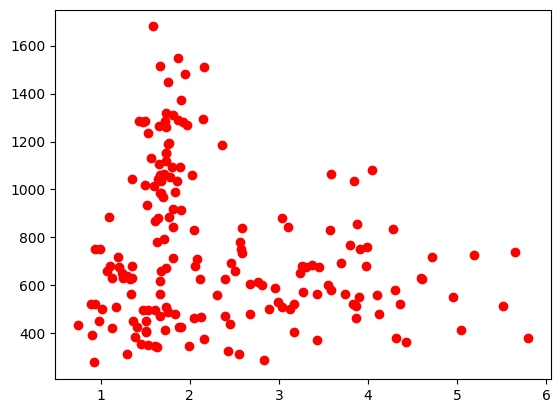

In [42]:
x_axis = data['Malic_Acid']
y_axis = data['Proline']
plt.scatter(x_axis,y_axis,c='red')
plt.show()

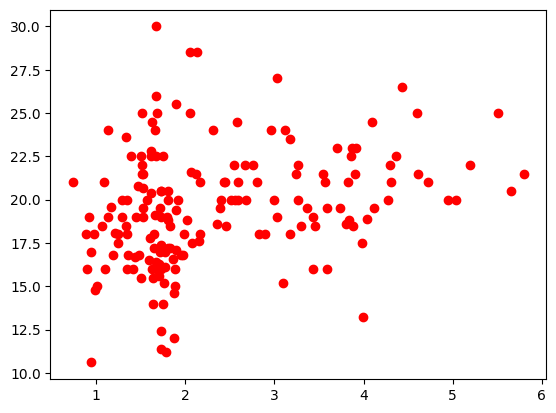

In [43]:
x_axis = data['Malic_Acid']
y_axis = data['Ash_Alcanity']
plt.scatter(x_axis,y_axis,c='red')
plt.show()

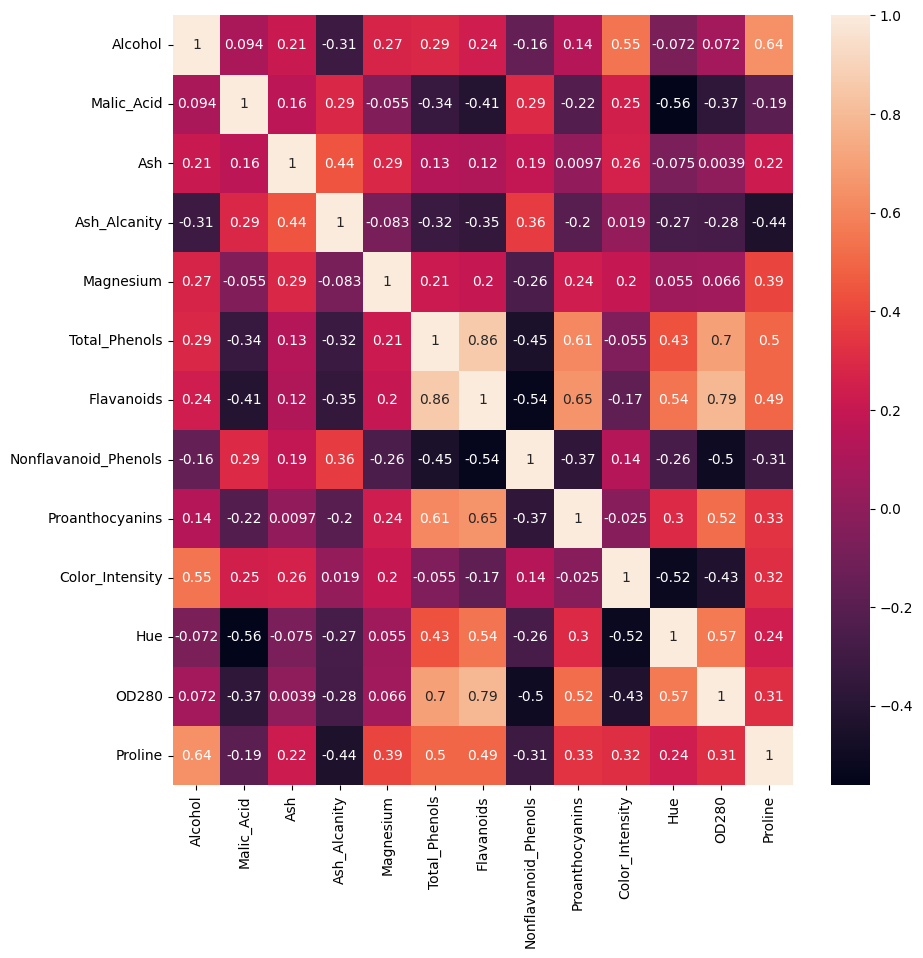

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

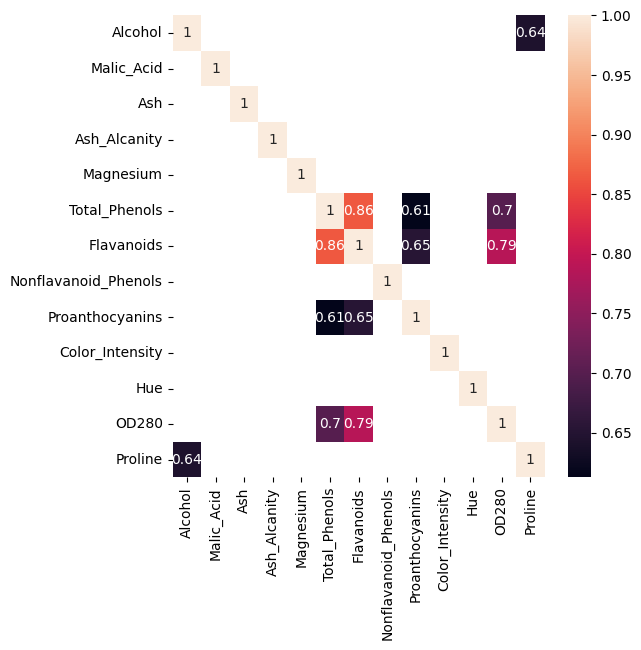

In [21]:
corr = data.corr().abs()
high_corr = corr[(corr)>.6]
plt.figure(figsize=(6, 6))
sns.heatmap(high_corr, annot=True)
plt.show()

In [32]:
hier_clust = linkage(data, method='ward')

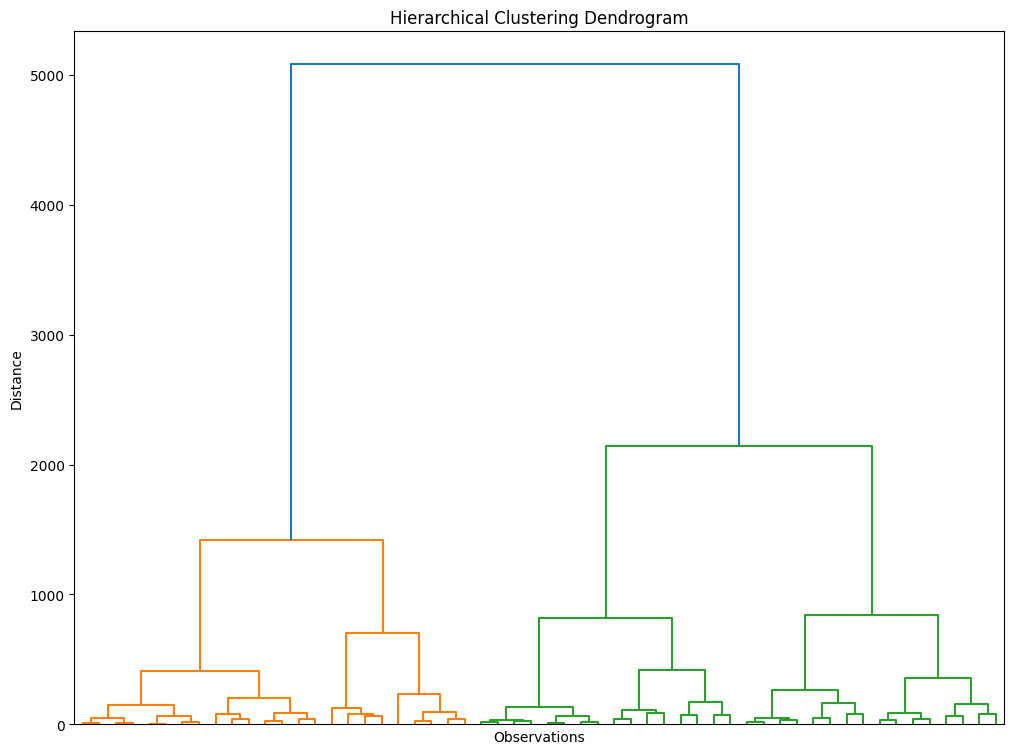

In [33]:
plt.figure(figsize=(12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True)
plt.show()

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(data)
    wcss.append(kmeans.inertia_)

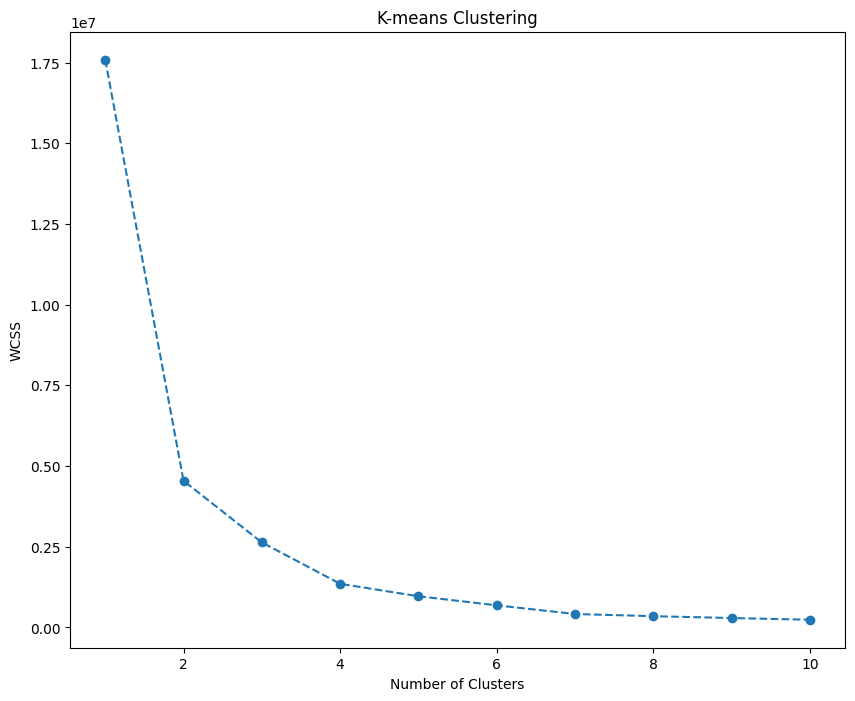

In [35]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
pred = kmeans.fit_predict(data)

In [38]:
import numpy as np
np.unique(kmeans.labels_)

array([0, 1])

In [39]:
k_means.cluster_centers_

array([[1.39205000e+01, 1.76900000e+00, 2.49750000e+00, 1.72000000e+01,
        1.06650000e+02, 2.90800000e+00, 3.08150000e+00, 2.95500000e-01,
        1.90850000e+00, 6.32250000e+00, 1.11700000e+00, 3.00850000e+00,
        1.36085000e+03],
       [1.24750877e+01, 2.32526316e+00, 2.28000000e+00, 2.06368421e+01,
        9.17192982e+01, 2.10578947e+00, 1.87140351e+00, 3.83333333e-01,
        1.46842105e+00, 3.95210525e+00, 9.60526316e-01, 2.54438596e+00,
        4.35578947e+02],
       [1.27416667e+01, 2.68354167e+00, 2.36416667e+00, 2.06125000e+01,
        9.71250000e+01, 1.96687500e+00, 1.32833333e+00, 4.12916667e-01,
        1.38562500e+00, 5.54187500e+00, 8.64583333e-01, 2.18875000e+00,
        6.36125000e+02],
       [1.37185185e+01, 1.96814815e+00, 2.37333333e+00, 1.68925926e+01,
        1.04666667e+02, 2.83703704e+00, 2.96444444e+00, 2.77777778e-01,
        1.91185185e+00, 5.24333333e+00, 1.04962963e+00, 3.19222222e+00,
        1.07240741e+03],
       [1.31776923e+01, 2.53846154e+

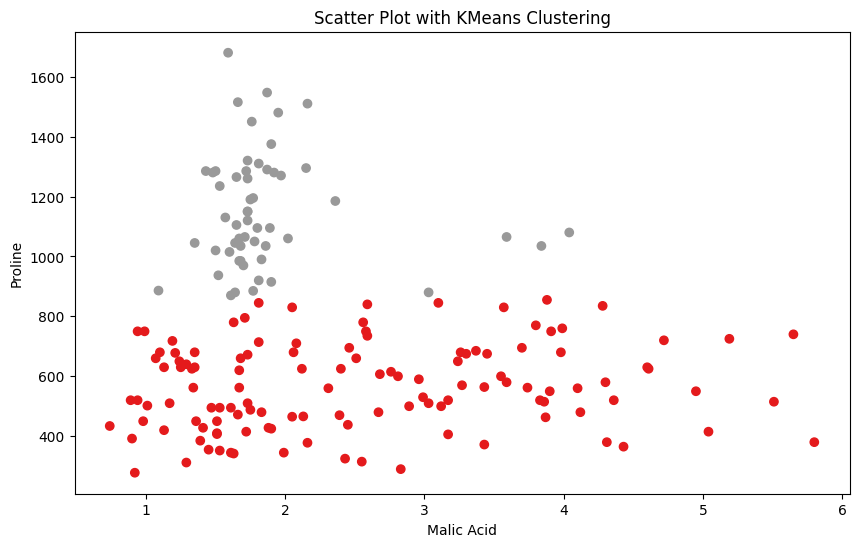

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Malic_Acid'], data['Proline'], c=pred, cmap='Set1')
plt.title('Scatter Plot with KMeans Clustering')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score


silhouette_score(data, labels=kmeans.labels_, metric='euclidean')

0.6568536504294317